In [1]:
import datacube
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

import sys

sys.path.insert (1, '../Tools/')
from dea_tools.datahandling import load_ard
from dea_tools.plotting import rgb, display_map
from dea_tools.coastal import model_tides, tidal_tag, pixel_tides, tidal_stats

In [2]:
dc = datacube.Datacube(app='Tidal_')

In [3]:
date_list = pd.date_range(start="2022-09-01", end="2022-09-30", freq="1H")

# Run the FES2014 tidal model
tide_df = model_tides(
    x=[150.601],
    y=[-34.863],
    time=date_list,
)

# Print outputs
tide_df.head()

,x,y,tide_m
time,,,
2022-09-01 00:00:00,150.601,-34.863,0.411352
2022-09-01 01:00:00,150.601,-34.863,0.529444
2022-09-01 02:00:00,150.601,-34.863,0.515538
2022-09-01 03:00:00,150.601,-34.863,0.374521
2022-09-01 04:00:00,150.601,-34.863,0.149689


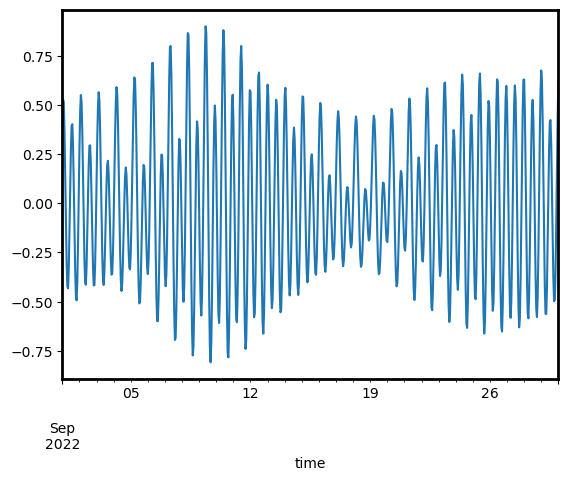

In [4]:
tide_df.tide_m.plot();

In [10]:
# Set up data load query
query = {
    'x': (122.10, 122.33),
    'y': (-18.09, -18.31),
    'time': ('2019', '2021'),
    'measurements': ['nbart_red', 'nbart_green', 'nbart_blue'],
    'output_crs': 'EPSG:32755',
    'resolution': (-30, 30),
    'group_by': 'solar_day',
    'dask_chunks': {},
}


In [11]:
display_map(x=query['x'], y=query['y'])